In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# !pip install pyreadstat

In [3]:
raw_welfare = pd.read_spss("/content/gdrive/MyDrive/Colab Notebooks/Koweps_hpwc14_2019_beta2.sav")

In [4]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [5]:
raw_welfare.shape

(14418, 830)

In [6]:
raw_welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [7]:
welfare = raw_welfare.copy()

In [8]:
welfare.shape

(14418, 830)

In [9]:
# 830개의 변수 중 분석에 필요한 7개 속성에 대해 이름 변경
welfare = welfare.rename(columns={'h14_g3':'sex','h14_g4':'birth','h14_g10':'marriage_type','h14_g11':'religion',
                         'p1402_8aq1':'income','h14_eco9':'code_job','h14_reg7':'code_region'})
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [10]:
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [11]:
welfare['sex']=np.where(welfare['sex']==1,'male','female')

In [12]:
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

<Axes: xlabel='income', ylabel='Count'>

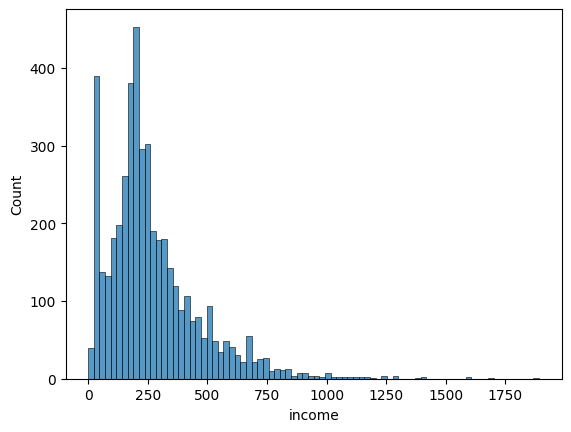

In [13]:
#히스토그램: 값의 분포를 시각적으로
sns.histplot(data=welfare, x='income')

In [14]:
welfare[['sex','income']]

,sex,income
0,female,NaN
1,male,NaN
2,male,107.0
3,male,192.0
4,female,NaN
...,...,...
14413,female,NaN
14414,female,NaN
14415,male,NaN
14416,female,200.0


In [15]:
#결측치 수 확인하기
welfare['income'].isna().sum()

9884

In [16]:
#결측치를 제거하고 성별별로 월급의 평균 요약표 만들기
sex_income = welfare.dropna(subset=['income']).groupby(['sex'],as_index=False).agg(avg_income=('income','mean'))

In [17]:
sex_income

,sex,avg_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='avg_income'>

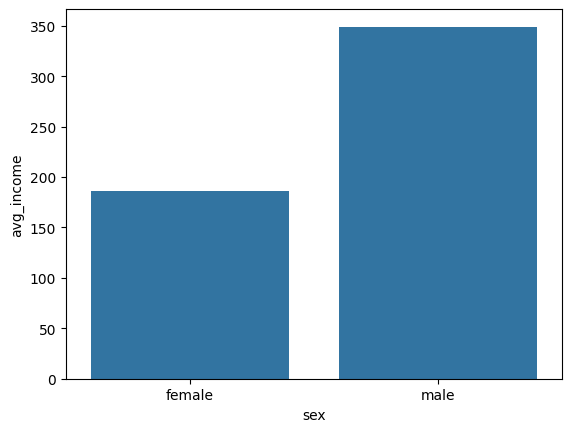

In [18]:
sns.barplot(data=sex_income, x='sex',y='avg_income')

In [19]:
#몇살의 월급이 가장많을까
welfare['age']=2019-welfare['birth']+1

In [20]:
income_by_age = welfare.dropna(subset=['income']).groupby(['age'],as_index=False).agg(age_income=('income','mean'))
income_by_age

,age,age_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471
...,...,...
69,88.0,27.000000
70,89.0,27.000000
71,90.0,27.000000
72,91.0,20.000000


[(20.0, 70.0)]

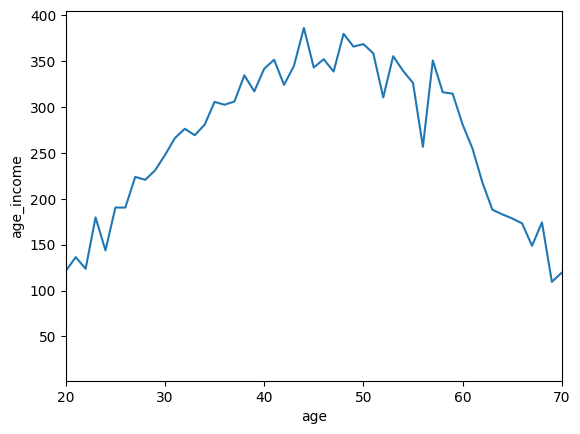

In [21]:
#나이도 시계열그래프로 보고 선그래프로 시각화하기
sns.lineplot(data=income_by_age,x='age',y='age_income').set(xlim=[20,70])

In [22]:
#연습) 초년 중년 노년의 인구 수 비교
# welfare['agegroup']=np.where(welfare['age']<30,'youngs',np.where(welfare['age']<60,'mids','olds'))
welfare = welfare.assign(ageg = np.where(welfare['age']<30,'youngs',np.where(welfare['age']<60,'mids','olds')))
age_g = welfare[['age','ageg']]
age_g

,age,ageg
0,75.0,olds
1,72.0,olds
2,78.0,olds
3,58.0,mids
4,57.0,mids
...,...,...
14413,53.0,mids
14414,28.0,youngs
14415,25.0,youngs
14416,22.0,youngs


<Axes: xlabel='ageg', ylabel='count'>

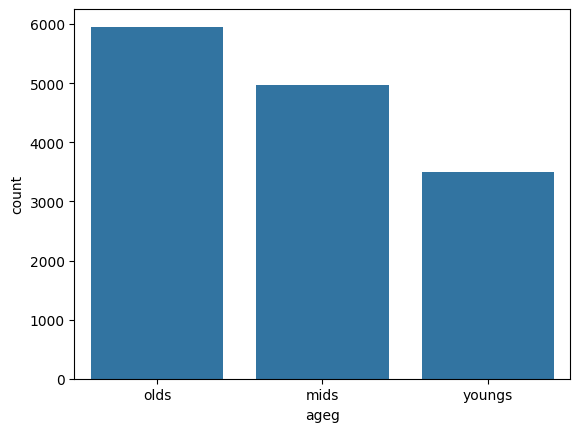

In [23]:
sns.countplot(data =age_g,x='ageg')

In [24]:
#연습) 연령그룹별 월급 차이 분석
ageg_to_income = welfare.dropna(subset=['income']).groupby(['ageg'],as_index=False).agg(mean_ageg_income=('income','mean'))
ageg_to_income

,ageg,mean_ageg_income
0,mids,329.157157
1,olds,140.129003
2,youngs,195.663424


<Axes: xlabel='ageg', ylabel='mean_ageg_income'>

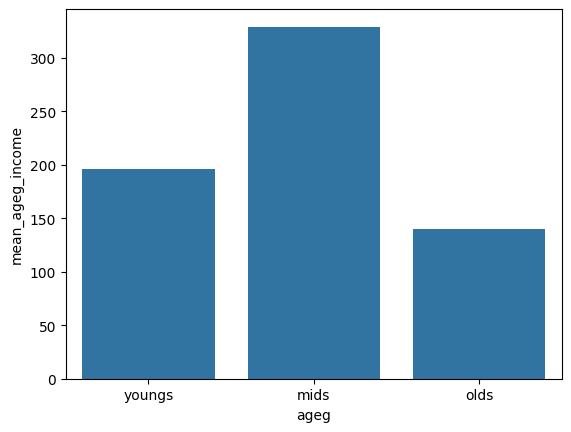

In [25]:

sns.barplot(data=ageg_to_income,x='ageg',y='mean_ageg_income',order=['youngs', 'mids', 'olds'])

In [26]:
#연령대별, 성별별 인컴 차이
income_by_ageandsex = welfare.assign(ageg = np.where(welfare['age']<30,'youngs',np.where(welfare['age']<60,'mids','olds'))).dropna(subset=['income'])\
 .groupby(['ageg','sex'],as_index=False).agg(mean_income=('income','mean'))
income_by_ageandsex

,ageg,sex,mean_income
0,mids,female,230.481735
1,mids,male,409.541228
2,olds,female,90.228896
3,olds,male,204.570231
4,youngs,female,189.822222
5,youngs,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

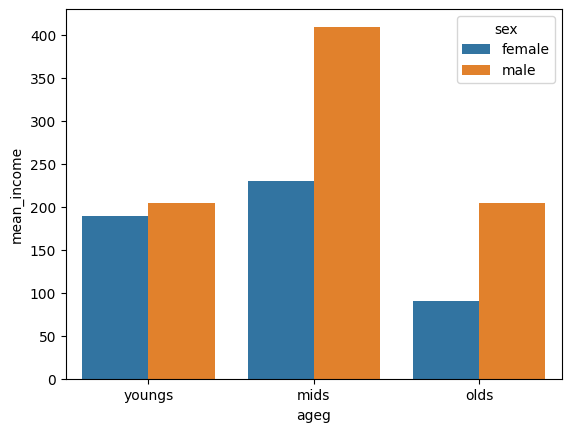

In [27]:
sns.barplot(data=income_by_ageandsex,x='ageg',hue='sex',y='mean_income',order=['youngs', 'mids', 'olds'])

In [28]:
welfare['age']

0        75.0
1        72.0
2        78.0
3        58.0
4        57.0
         ... 
14413    53.0
14414    28.0
14415    25.0
14416    22.0
14417    19.0
Name: age, Length: 14418, dtype: float64

In [29]:
income_by_ageandsex2 = welfare.dropna(subset=['income']).groupby(['age','sex'],as_index=False).agg(mean_income=('income','mean'))
income_by_ageandsex2

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

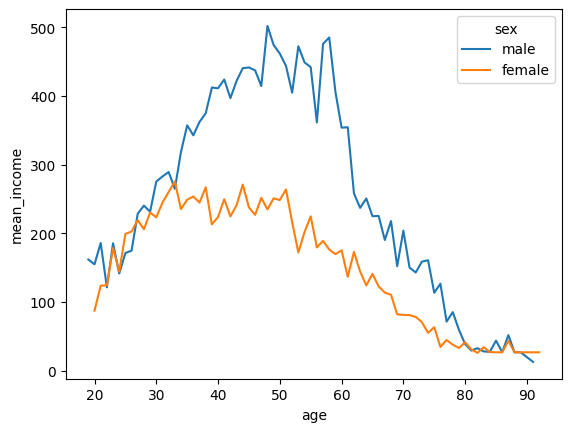

In [30]:
sns.lineplot(data=income_by_ageandsex2, x= 'age', hue='sex',y='mean_income')

In [31]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

In [32]:
codebook = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Koweps_Codebook_2019.xlsx",sheet_name='직종코드')
codebook

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [33]:
welfare = pd.merge(welfare,codebook, how='left')
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,ageg,job
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,75.0,olds,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,72.0,olds,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,NaN,NaN,1284.0,NaN,0.0,NaN,78.0,olds,전기공
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN,58.0,mids,금속기계 부품 조립원
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,5.0,2.0,NaN,NaN,NaN,0.0,NaN,57.0,mids,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,53.0,mids,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,28.0,youngs,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,208.0,NaN,0.0,NaN,25.0,youngs,건설 및 광업 단순 종사자
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,NaN,1200.0,NaN,0.0,NaN,22.0,youngs,보건 의료 관련 종사자


In [34]:
welfare['job'].isna().sum()

7540

In [35]:
occu = welfare.dropna(subset=['income']).groupby(['job']).agg(mean_income=('income','mean'))
top10 = occu.sort_values(by='mean_income',ascending=False).head(10)
top10

,mean_income
job,
의료 진료 전문가,781.000000
법률 전문가,776.333333
행정 및 경영 지원 관리자,771.833333
보험 및 금융 관리자,734.750000
재활용 처리 및 소각로 조작원,688.000000
컴퓨터 하드웨어 및 통신공학 전문가,679.444444
기계∙로봇공학 기술자 및 시험원,669.166667
건설∙전기 및 생산 관련 관리자,603.083333
제관원 및 판금원,597.000000


In [36]:
!sudo apt-get install -y fonts-nanum #글꼴 다운
!sudo fc-cache -fv #컴퓨터에 글꼴 적용
!rm ~/.cache/matplotlib -rf #matplotlib에 설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

<Axes: xlabel='mean_income', ylabel='job'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


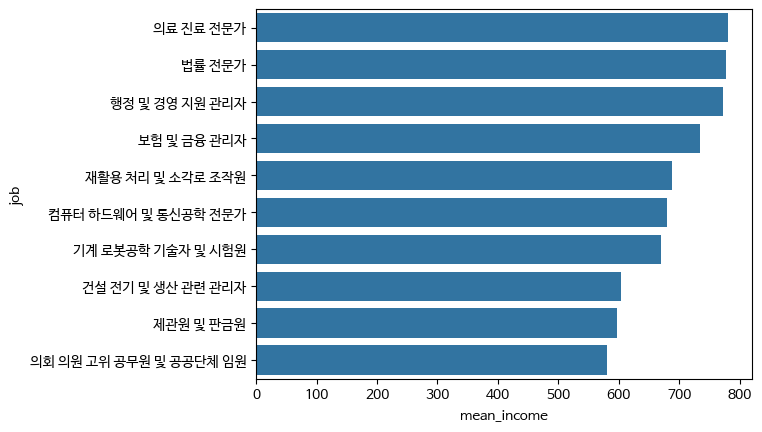

In [38]:
sns.barplot(data=top10, x='mean_income',y='job')
# plt.show()

In [39]:
#월급이 가장 낮은 하위10개 직업 알아보기
bottom10 = occu.sort_values('mean_income').head(10)
bottom10

,mean_income
job,
기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
기타 서비스 관련 단순 종사자,77.789474
청소원 및 환경미화원,88.461756
가사 및 육아 도우미,92.455882
돌봄 및 보건 서비스 종사자,117.162338
음식 관련 단순 종사자,118.187500
농림∙어업 관련 단순 종사자,122.625000
학예사∙사서 및 기록물 관리사,140.000000
채굴 및 토목 관련 기능 종사자,140.000000


[(0.0, 800.0)]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


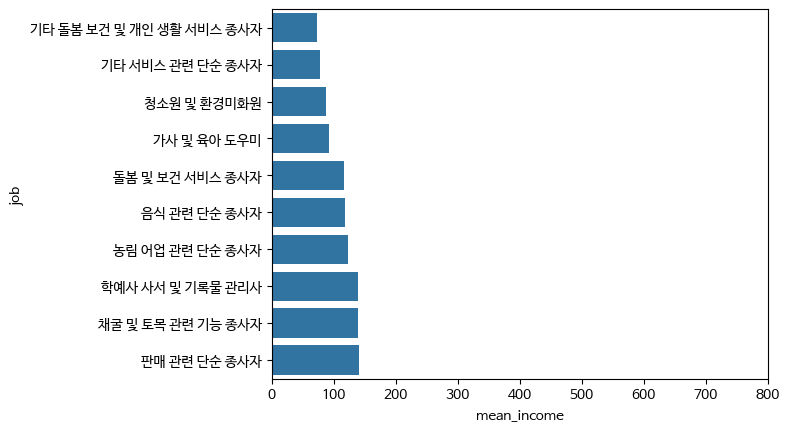

In [40]:
sns.barplot(data=bottom10,y='job',x='mean_income').set(xlim=[0,800])

In [41]:
# 남성 종사 직업 탑텐
maletop10 = welfare[welfare['sex']=='male']\
  .dropna(subset=['job'])\
  .groupby(['job'],as_index=False)\
  .agg(count_job=('job','count'))\
  .sort_values('count_job',ascending=False)\
  .head(10)
maletop10

,job,count_job
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [42]:
# 여성 종사 직업 탑텐
femaletop10 = welfare.query("sex=='female'")\
  .dropna(subset=['job'])\
  .groupby(['job'],as_index=False)\
  .agg(count_job=('job','count'))\
  .sort_values('count_job',ascending=False)\
  .head(10)
femaletop10

,job,count_job
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


<Axes: xlabel='count_job', ylabel='job'>

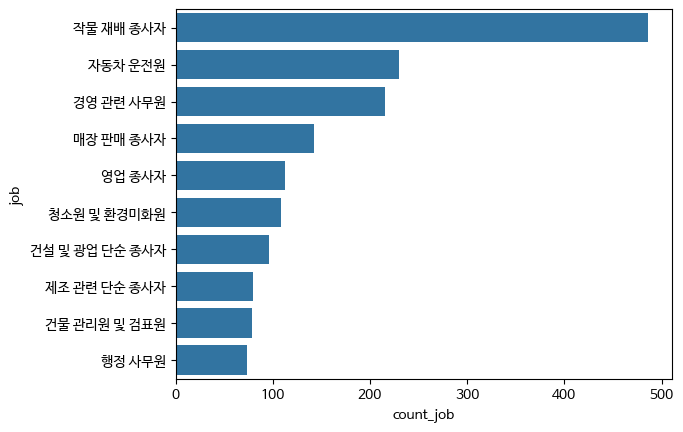

In [43]:
sns.barplot(data=maletop10,x='count_job',y='job')

[(0.0, 500.0)]

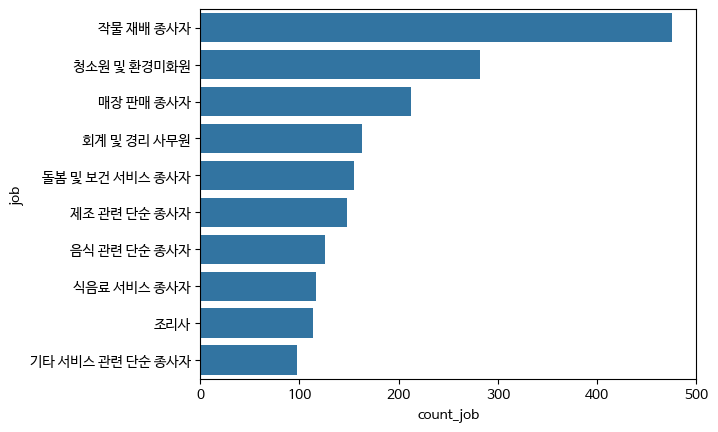

In [44]:
sns.barplot(data=femaletop10, x='count_job',y='job').set(xlim=[0,500])

In [45]:
#종교유무를 yes,no로 바꾸자
welfare['religion']=np.where(welfare['religion']==1,'yes','no')
# 종교가 있으면 이혼률이 낮은가
# 우리느 1,3만 궁금하니까 그것만 뽑자
welfare['marriage_type'] = np.where(welfare['marriage_type']==1, 'married',
                                     np.where(welfare['marriage_type']==3, 'divorced','etc'))
welfare['marriage_type'].value_counts()

married     7190
etc         6539
divorced     689
Name: marriage_type, dtype: int64

In [46]:
# 혼인상태별 빈도를 요약표로 만드러보자.
w1 = welfare[['religion','marriage_type']]
w1 = w1.groupby(['religion'],as_index=False)['marriage_type'].value_counts()


,religion,marriage_type,count
0,no,etc,3771
1,no,married,3660
2,no,divorced,384
3,yes,married,3530
4,yes,etc,2768
5,yes,divorced,305


<Axes: xlabel='marriage_type', ylabel='count'>

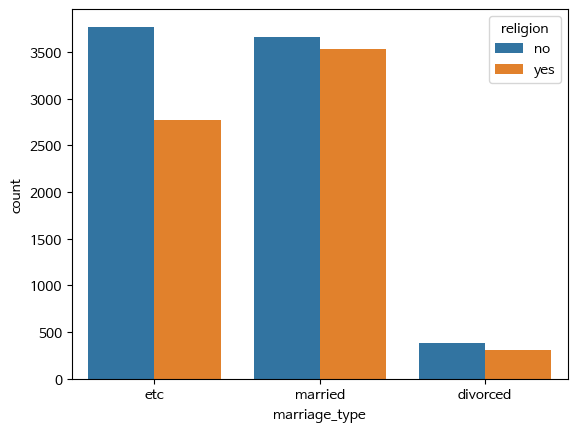

In [47]:
sns.barplot(data = w1, x = 'marriage_type',y='count',hue='religion')

In [50]:
#종교유무에 따른 이혼률 표 만듥;ㅣ
rel_div = welfare.query('marriage_type!="etc"').groupby('religion',as_index=False)['marriage_type']\
  .value_counts(normalize=True)
rel_div

,religion,marriage_type,proportion
0,no,married,0.905045
1,no,divorced,0.094955
2,yes,married,0.920469
3,yes,divorced,0.079531


<Axes: xlabel='religion', ylabel='proportion'>

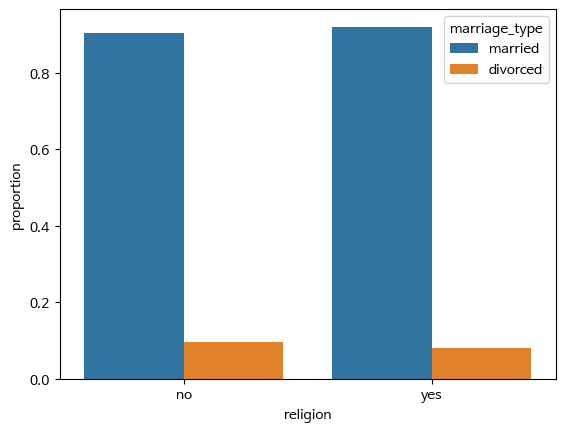

In [52]:
sns.barplot(data = rel_div, x = 'religion',y='proportion',hue='marriage_type')

In [64]:
# 혼인상태가 divorced인 것만 추출해서 백분율로 나타내기
rel_div = rel_div.query('marriage_type=="divorced"').assign(proportion=rel_div['proportion'])\



<Axes: xlabel='religion', ylabel='proportion'>

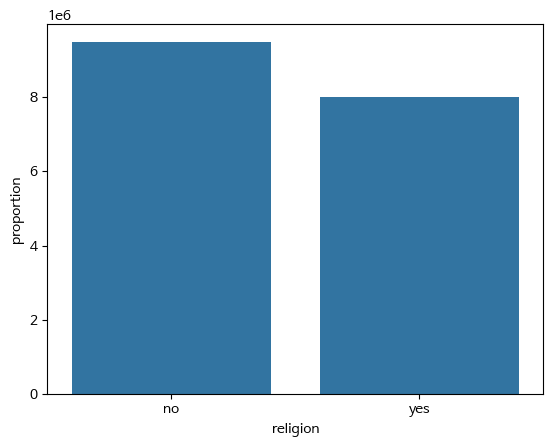

In [65]:
sns.barplot(data = rel_div, x = 'religion',y='proportion')

In [66]:
welfare['code_region']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14413    5.0
14414    5.0
14415    5.0
14416    5.0
14417    5.0
Name: code_region, Length: 14418, dtype: float64

In [104]:
# 노년인구가 가장 많은 지역은?
list_region = pd.DataFrame({
    'code_region':[1,2,3,4,5,6,7],
    'region':['서울','수도권','부산,경남,울산','대구,경북','대전,충남','강원,충북','광주,전남,전북,제주']
})
welfare = pd.merge(welfare,list_region,how='left')
region_age = welfare[['ageg','region']]
region_age

,ageg,region
0,olds,서울
1,olds,서울
2,olds,서울
3,mids,서울
4,mids,서울
...,...,...
14413,mids,"대전,충남"
14414,youngs,"대전,충남"
14415,youngs,"대전,충남"
14416,youngs,"대전,충남"


In [119]:
#지역별 연령대별 비율표
region_ageg = welfare.groupby('region',as_index=False)['ageg'].value_counts(normalize=True)
region_ageg

,region,ageg,proportion
0,"강원,충북",olds,0.459103
1,"강원,충북",mids,0.308707
2,"강원,충북",youngs,0.232190
3,"광주,전남,전북,제주",olds,0.449311
4,"광주,전남,전북,제주",mids,0.317924
5,"광주,전남,전북,제주",youngs,0.232766
6,"대구,경북",olds,0.504051
7,"대구,경북",mids,0.296296
8,"대구,경북",youngs,0.199653
9,"대전,충남",olds,0.413372


In [120]:
# 쟤를 백분율로 표시하자
region_ageg = region_ageg.assign(proportion=(region_ageg['proportion']*100).round(1))
region_ageg

,region,ageg,proportion
0,"강원,충북",olds,45.9
1,"강원,충북",mids,30.9
2,"강원,충북",youngs,23.2
3,"광주,전남,전북,제주",olds,44.9
4,"광주,전남,전북,제주",mids,31.8
5,"광주,전남,전북,제주",youngs,23.3
6,"대구,경북",olds,50.4
7,"대구,경북",mids,29.6
8,"대구,경북",youngs,20.0
9,"대전,충남",olds,41.3


<Axes: xlabel='proportion', ylabel='region'>

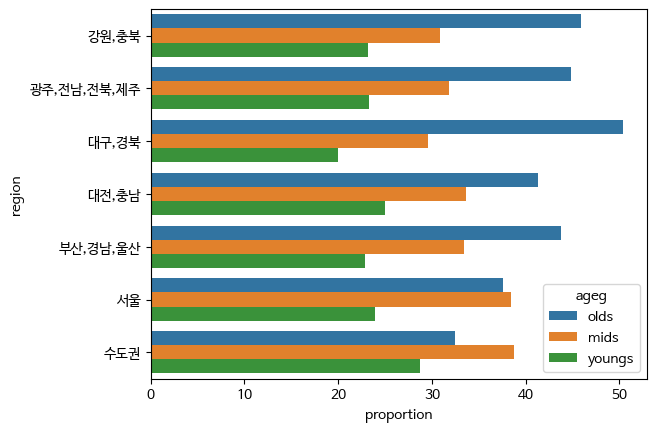

In [121]:
sns.barplot(data=region_ageg, x='proportion', y='region',hue='ageg')

In [ ]:
|